In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/50 [..............................] - ETA: 6s - loss: 2.4267 - accuracy: 0.0703

2023-07-12 13:54:37.317346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 2ms/step - loss: 2.2957 - accuracy: 0.1291 - val_loss: 2.2095 - val_accuracy: 0.2030
Epoch 2/1000
 1/50 [..............................] - ETA: 0s - loss: 2.2593 - accuracy: 0.1719
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 870us/step - loss: 2.1960 - accuracy: 0.1960 - val_loss: 2.1080 - val_accuracy: 0.2721
Epoch 3/1000
 1/50 [..............................] - ETA: 0s - loss: 2.1874 - accuracy: 0.1875
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 876us/step - loss: 2.1126 - accuracy: 0.2399 - val_loss: 1.9780 - val_accuracy: 0.3474
Epoch 4/1000
 1/50 [..............................] - ETA: 0s - loss: 2.0448 - accuracy: 0.3047
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [=========

 1/50 [..............................] - ETA: 0s - loss: 1.1324 - accuracy: 0.5625
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 875us/step - loss: 1.1320 - accuracy: 0.5590 - val_loss: 0.7464 - val_accuracy: 0.8211
Epoch 29/1000
 1/50 [..............................] - ETA: 0s - loss: 1.1763 - accuracy: 0.5703
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 883us/step - loss: 1.1233 - accuracy: 0.5639 - val_loss: 0.7323 - val_accuracy: 0.7989
Epoch 30/1000
 1/50 [..............................] - ETA: 0s - loss: 1.0451 - accuracy: 0.6094
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 874us/step - loss: 1.0954 - accuracy: 0.5668 - val_loss: 0.7127 - val_accuracy: 0.8282
Epoch 31/1000
 1/50 [..............................] - ETA: 0s - loss: 1.1570 - accuracy: 0.5234
Ep

Epoch 55/1000
 1/50 [..............................] - ETA: 0s - loss: 0.9475 - accuracy: 0.5703
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 957us/step - loss: 0.9367 - accuracy: 0.6329 - val_loss: 0.5796 - val_accuracy: 0.9143
Epoch 56/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8755 - accuracy: 0.7031
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 856us/step - loss: 0.9397 - accuracy: 0.6346 - val_loss: 0.5769 - val_accuracy: 0.9295
Epoch 57/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8811 - accuracy: 0.6562
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 828us/step - loss: 0.9232 - accuracy: 0.6400 - val_loss: 0.5624 - val_accuracy: 0.9300
Epoch 58/1000
 1/50 [..............................] - ETA: 0s - loss: 0.7870 - accur

Epoch 82/1000
 1/50 [..............................] - ETA: 0s - loss: 0.9113 - accuracy: 0.6250
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 844us/step - loss: 0.8454 - accuracy: 0.6668 - val_loss: 0.5240 - val_accuracy: 0.9527
Epoch 83/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8890 - accuracy: 0.6562
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 852us/step - loss: 0.8584 - accuracy: 0.6765 - val_loss: 0.5312 - val_accuracy: 0.9550
Epoch 84/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8054 - accuracy: 0.7422
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 833us/step - loss: 0.8553 - accuracy: 0.6648 - val_loss: 0.5300 - val_accuracy: 0.9498
Epoch 85/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8976 - accur

Epoch 109/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8988 - accuracy: 0.6094
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 872us/step - loss: 0.7978 - accuracy: 0.6883 - val_loss: 0.4871 - val_accuracy: 0.9669
Epoch 110/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8131 - accuracy: 0.6719
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 870us/step - loss: 0.7742 - accuracy: 0.7053 - val_loss: 0.4738 - val_accuracy: 0.9655
Epoch 111/1000
 1/50 [..............................] - ETA: 0s - loss: 0.7896 - accuracy: 0.6875
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 851us/step - loss: 0.7823 - accuracy: 0.6949 - val_loss: 0.5061 - val_accuracy: 0.9621
Epoch 112/1000
 1/50 [..............................] - ETA: 0s - loss: 0.6003 

Epoch 136/1000
 1/50 [..............................] - ETA: 0s - loss: 0.8251 - accuracy: 0.6875
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
50/50 [==============================] - 0s 866us/step - loss: 0.7185 - accuracy: 0.7306 - val_loss: 0.5117 - val_accuracy: 0.9593
Epoch 136: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 379us/step - loss: 0.5117 - accuracy: 0.9593


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 31ms/step
[1.6348401e-02 9.3688148e-01 1.2921352e-03 3.9532399e-03 4.8661535e-03
 3.1766351e-05 1.5170165e-02 2.9924975e-03 1.2751032e-02 5.7132016e-03]
1


# 混同行列

67/67 [==============================] - 0s 270us/step


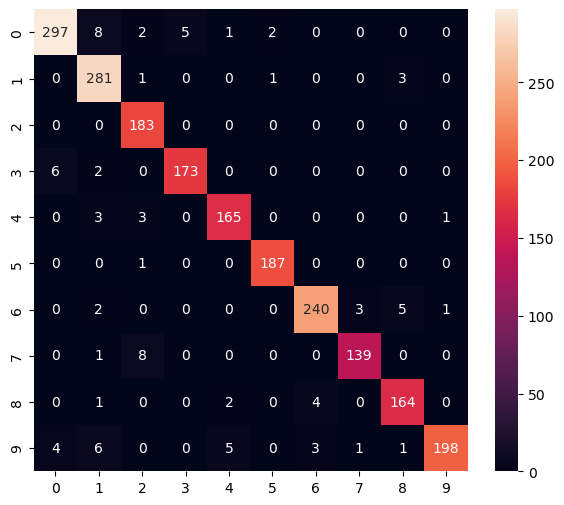

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       315
           1       0.92      0.98      0.95       286
           2       0.92      1.00      0.96       183
           3       0.97      0.96      0.96       181
           4       0.95      0.96      0.96       172
           5       0.98      0.99      0.99       188
           6       0.97      0.96      0.96       251
           7       0.97      0.94      0.96       148
           8       0.95      0.96      0.95       171
           9       0.99      0.91      0.95       218

    accuracy                           0.96      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.96      0.96      0.96      2113



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp3_eyeddq/assets


2023-07-12 13:54:44.526186: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-07-12 13:54:44.526211: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-07-12 13:54:44.526624: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp3_eyeddq
2023-07-12 13:54:44.527461: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-07-12 13:54:44.527465: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp3_eyeddq
2023-07-12 13:54:44.529562: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-07-12 13:54:44.530066: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-07-12 13:54:44.553448: I tensorflow/cc/saved_model/loader.

6808

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 314 µs, sys: 511 µs, total: 825 µs
Wall time: 505 µs


# print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))